<a href="https://colab.research.google.com/github/valterlucena/recuperacao-informacao/blob/master/zipf/statistics_zipf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Questão 1

In [0]:
data_url = 'https://raw.githubusercontent.com/valterlucena/ri_lab_01/master/output/results.csv'
news = pd.read_csv(data_url).replace(np.nan, '', regex=True)
total_documents = news.text.count()

toker = RegexpTokenizer('''\w+[-']*\w*''')

def isValid(token):
  return not bool(re.search(r'\d', token))

word_list = []
for new in news.text:
  tokens = [token for token in toker.tokenize(new.lower()) if isValid(token)]
  word_list.extend(tokens)

total_word_occurences = len(word_list)
vocabulary_size = len(set(word_list))

words = pd.DataFrame(word_list, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')

occurs_mt_thousand = len(word_counts[word_counts.freq > 1000])
occurs_once = len(word_counts[word_counts.freq == 1])

statistics = ['Total documents', 
              'Total word occurences',
              'Vocabulary size',
              'Words occuring > 1000 times',
              'Words occuring once'
             ]

values = [total_documents,
          total_word_occurences,
          vocabulary_size,
          occurs_mt_thousand,
          occurs_once
         ]

result_table = pd.DataFrame(data={'statistics': statistics, 'values': values})
result_table

,statistics,values
0,Total documents,146
1,Total word occurences,60108
2,Vocabulary size,10274
3,Words occuring > 1000 times,6
4,Words occuring once,5678


# Questão 2

In [0]:
pr = (word_counts.freq / total_word_occurences)
word_counts['Pr %'] = round(pr * 100, 2)
r_pr = word_counts.r * pr
word_counts['r.Pr'] = round(r_pr, 3)
word_counts[0:50]

# Questão 3

In [0]:
word_counts['pred'] = np.mean(r_pr) / pr

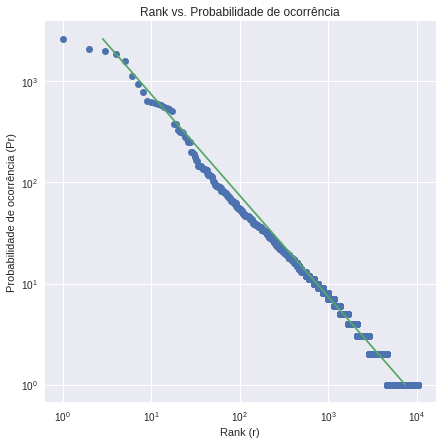

In [0]:
%matplotlib inline

f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")
plt.plot(word_counts["r"], word_counts["freq"], linestyle="", marker="o")
plt.plot(word_counts["pred"], word_counts["freq"], linestyle="-", marker="")
plt.title('Rank vs. Probabilidade de ocorrência')
plt.xlabel('Rank (r)')
plt.ylabel('Probabilidade de ocorrência (Pr)')
plt.show()

In [0]:
bigram_list = []

for new in news.text:
  tokens = [token for token in toker.tokenize(new.lower()) if isValid(token)]
  bigram_list.extend(list(nltk.bigrams(tokens)))

bigrams_words = [bigram[0] + ' ' + bigram[1] for bigram in bigram_list]

bigrams = pd.DataFrame(bigrams_words, columns=['bigram'])
bigram_counts = bigrams.bigram.value_counts().reset_index()
bigram_counts.columns = ['bigram', 'freq']
bigram_counts['r'] = bigram_counts.freq.rank(ascending=False, method='first')

bigram_counts[0:50]

,bigram,freq,r
0,que o,142,1.0
1,com a,119,2.0
2,o que,119,3.0
3,com o,118,4.0
4,que a,114,5.0
5,de que,86,6.0
6,que não,83,7.0
7,de um,81,8.0
8,e o,80,9.0
9,e a,75,10.0


In [0]:
bigram_total_occurence = bigram_counts.freq.sum()
bigram_pr = (bigram_counts.freq / bigram_total_occurence)
bigram_counts['Pr %'] = round(bigram_pr * 100, 2)
bigram_r_pr = bigram_counts.r * bigram_pr
bigram_counts['r.Pr'] = round(bigram_r_pr, 3)
bigram_counts['pred'] = np.mean(bigram_r_pr) / (bigram_pr)
bigram_counts[0:50]

,bigram,freq,r,Pr %,r.Pr,pred
0,que o,142,1.0,0.24,0.002,147.537623
1,com a,119,2.0,0.20,0.004,176.053298
2,o que,119,3.0,0.20,0.006,176.053298
3,com o,118,4.0,0.20,0.008,177.545275
4,que a,114,5.0,0.19,0.010,183.774934
5,de que,86,6.0,0.14,0.009,243.608633
6,que não,83,7.0,0.14,0.010,252.413764
7,de um,81,8.0,0.14,0.011,258.646203
8,e o,80,9.0,0.13,0.012,261.879280
9,e a,75,10.0,0.13,0.013,279.337899


[]

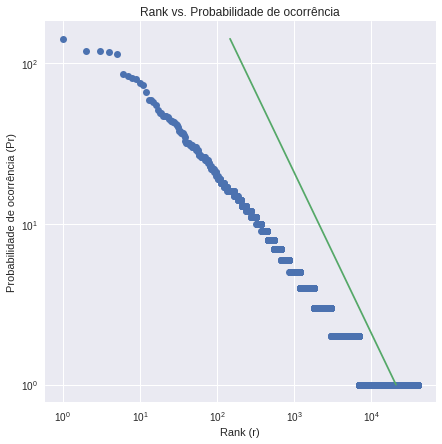

In [0]:
%matplotlib inline

f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")
plt.plot(bigram_counts["r"], bigram_counts["freq"], linestyle="", marker="o")
plt.plot(bigram_counts["pred"], bigram_counts["freq"], linestyle="-", marker="")
plt.title('Rank vs. Probabilidade de ocorrência')
plt.xlabel('Rank (r)')
plt.ylabel('Probabilidade de ocorrência (Pr)')
plt.plot()

# Questao 4

In [0]:
def get_occurrences_count(n):
  return len(word_counts[word_counts.freq == n])

number_of_occurrences = [i for i in range(1, 11, 1)]
predicted_proportion = [round(1.0 / (n*(n+1)), 3) for n in number_of_occurrences]
actual_proportion = [round(get_occurrences_count(n) / vocabulary_size, 3) 
                     for n in number_of_occurrences]
actual_number_words = [get_occurrences_count(n) for n in number_of_occurrences]

columns = ['Number of Occurrences',
           'Predicted proportion',
           'Actual Proportion',
           'Actual Number of Words'
          ]
values = [number_of_occurrences,
         predicted_proportion,
         actual_proportion,
         actual_number_words
         ]
occurrences = pd.DataFrame(data = np.transpose(values), columns=columns)
occurrences